## **Introduction in Matplotlib**

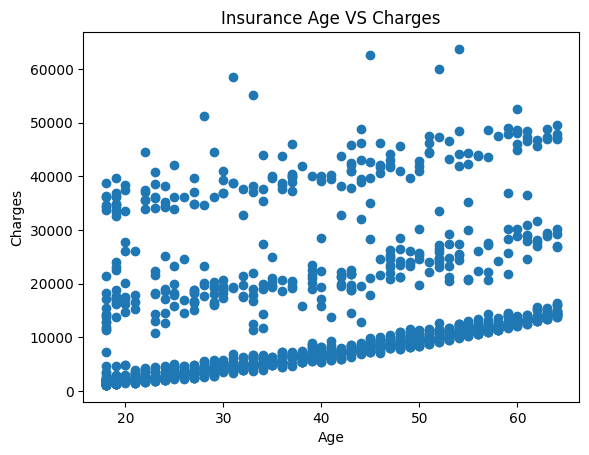

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("http://www.ishelp.info/data/insurance.csv")

plt.scatter(df.age, df.charges)
plt.title("Insurance Age VS Charges")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show() #to get rid of the text

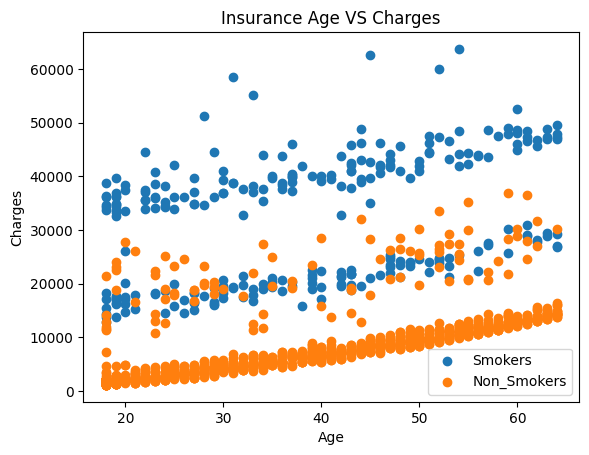

In [ ]:
# split into two grps of smokers & non smokers while plotting in one

df_smoker = df[df['smoker'] == 'yes']
df_non_smoker = df[df['smoker'] == 'no']


plt.scatter(df_smoker.age, df_smoker.charges, label ='Smokers')
plt.scatter(df_non_smoker.age, df_non_smoker.charges, label = 'Non_Smokers')

plt.title("Insurance Age VS Charges")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# to get labels use legend()
# non_smokers = cost less
# smoker = cost high

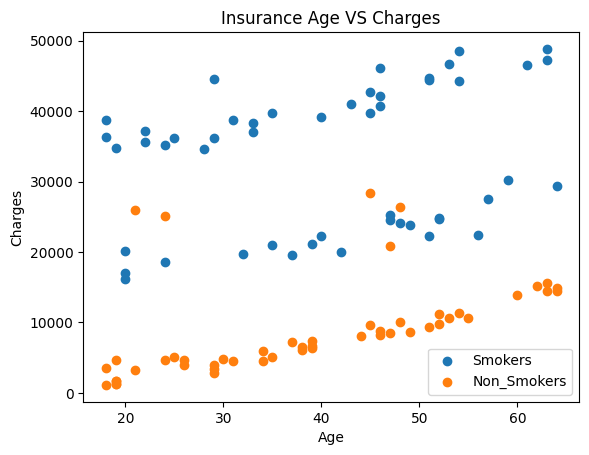

In [ ]:
# to get further in the mixed region , reduce sample size

df_smoker_reduced = df_smoker.sample(50)
df_non_smoker_reduced = df_non_smoker.sample(50)


plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label ='Smokers')
plt.scatter(df_non_smoker_reduced.age, df_non_smoker_reduced.charges, label = 'Non_Smokers')

plt.title("Insurance Age VS Charges")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

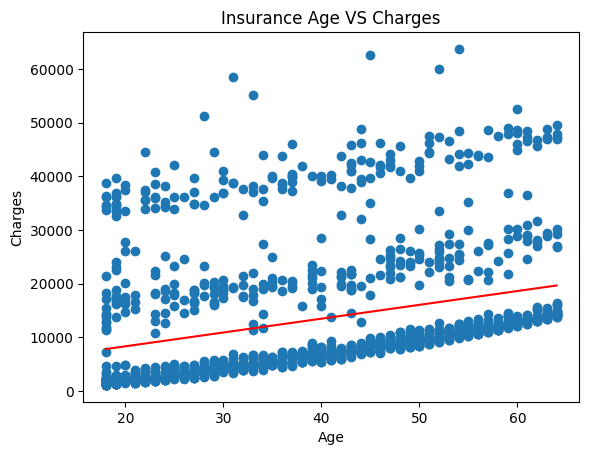

In [ ]:
# add linear regression line

from scipy import stats
m, b, r, p, err = stats.linregress(df.age, df.charges) #store the result in same order

# to automate use df.age.max()
x = range(18, 65)
y = m * x + b
plt.plot(x, y, color = 'red')

# y = mx + b as slope
# y = slope(x) + intercept
# rvalue = correlation
# pvalue

plt.scatter(df.age, df.charges)
plt.title("Insurance Age VS Charges")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show() #to get rid of the text

## **Heteroscedasticity**

In [ ]:
# Heteroscedasticity = spread accross all values of x
# assume the spread is consistent
# via this we can judge to where would predictions be more or less accurate
# learn more in stats330

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


# Fit the OLS model - to calculate the diff b/w line and each pt while storing them
model = ols(formula='charges~age', data=df).fit()
white_test = het_white(model.resid, model.model.exog) #exog = get independent var
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df.round(3)


# difference is consistent for one of side of charge - age
# still we have 3 tiers of data spread diffenetly

,LM stat,LM p-value,F-stat,F p-value
White,0.003,0.999,0.001,0.999
Breusch-Pagan,0.000,0.984,0.000,0.984


### **More with seanborn**

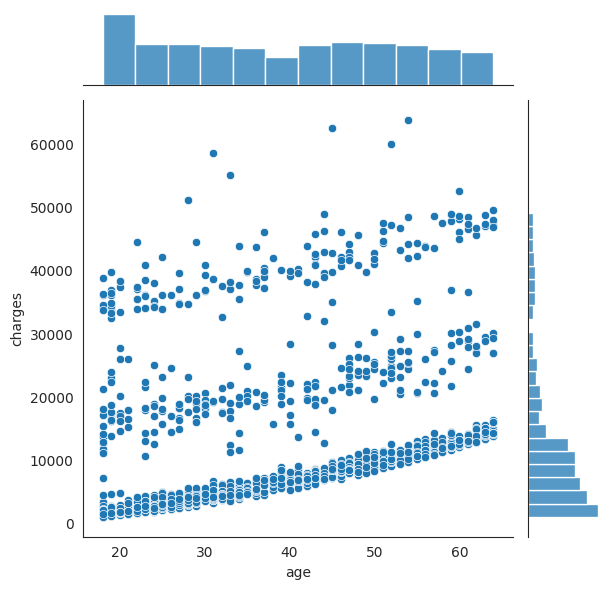

In [ ]:
import seaborn as sns

# base plot
sns.set_style('white')

# Joint plot

sns.jointplot(x = 'age', y ='charges', data = df);

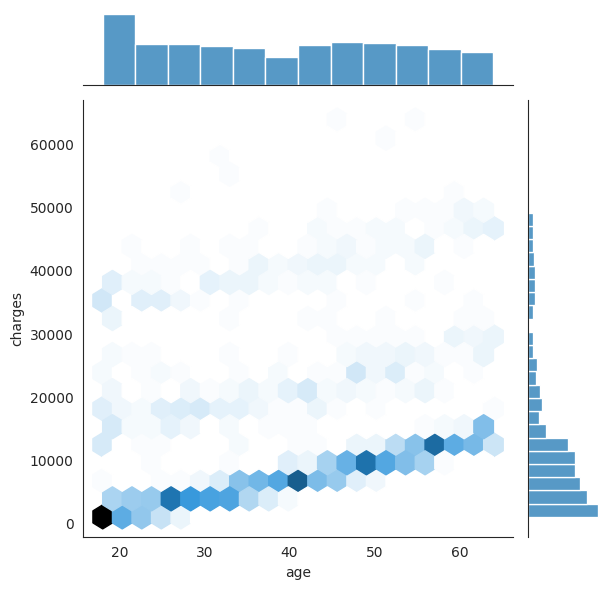

In [ ]:
# to check the density of pts in diff areas

sns.jointplot(x = 'age', y ='charges', data = df, kind ='hex');

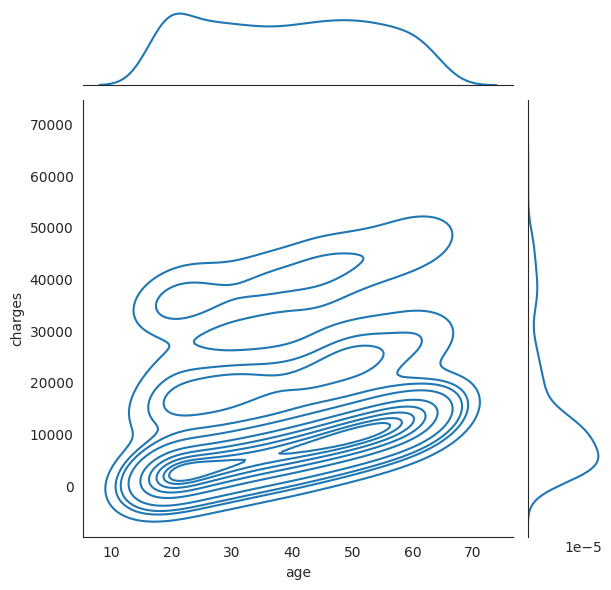

In [ ]:
# KDE plot - kernel density estimation, for the flow of values build on joint plot

sns.jointplot(x = 'age', y ='charges', data = df, kind ='kde');

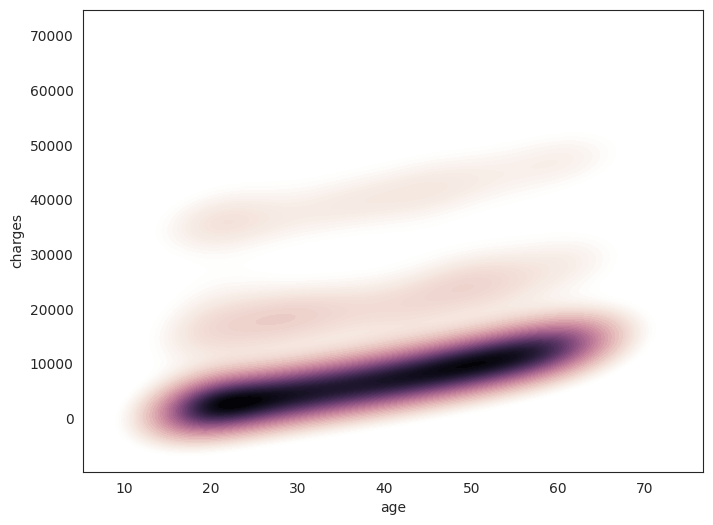

In [ ]:
# dark = dense, light= less dense
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)

# Separate variables
sns.kdeplot(x=df['age'], y=df['charges'], cmap=cmap, n_levels=60, fill=True)
plt.show()

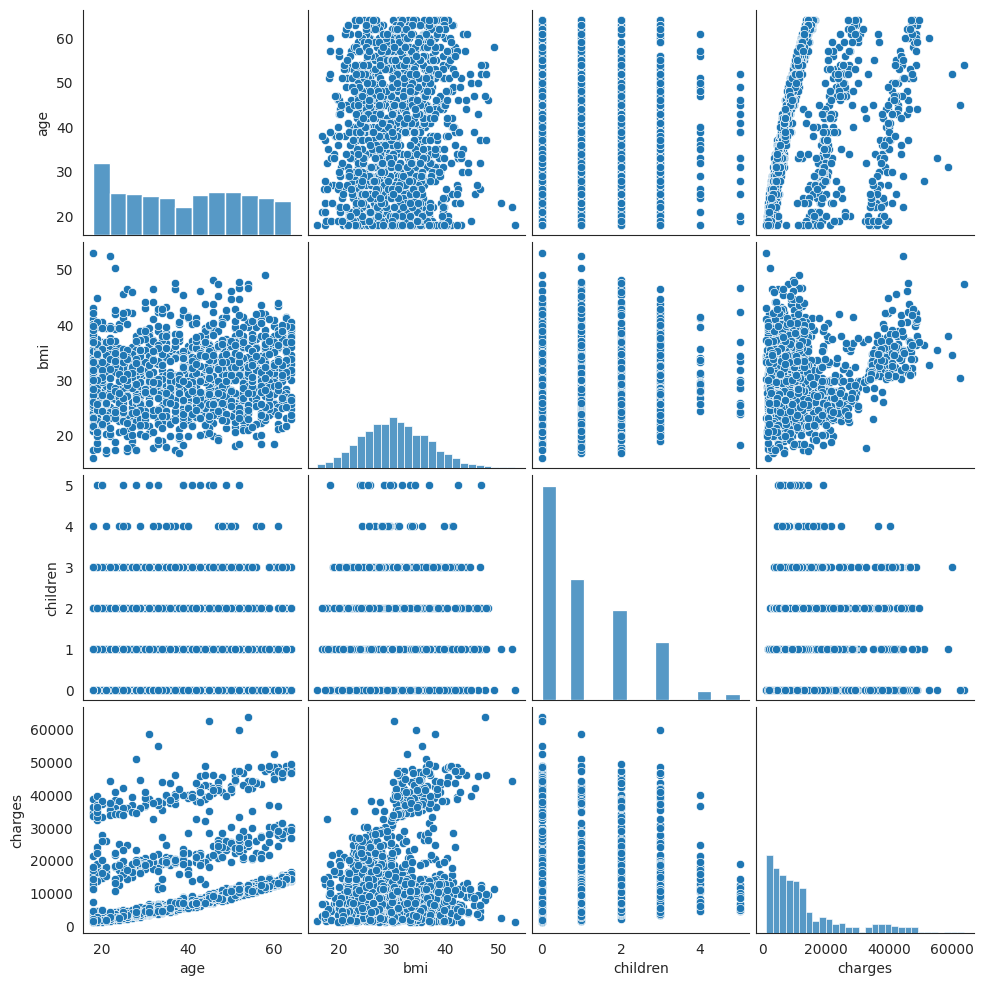

In [ ]:
#  ; is used to clear any text msgs
# discrete data is difficult to viz

df.dropna(inplace =True)
sns.pairplot(df);

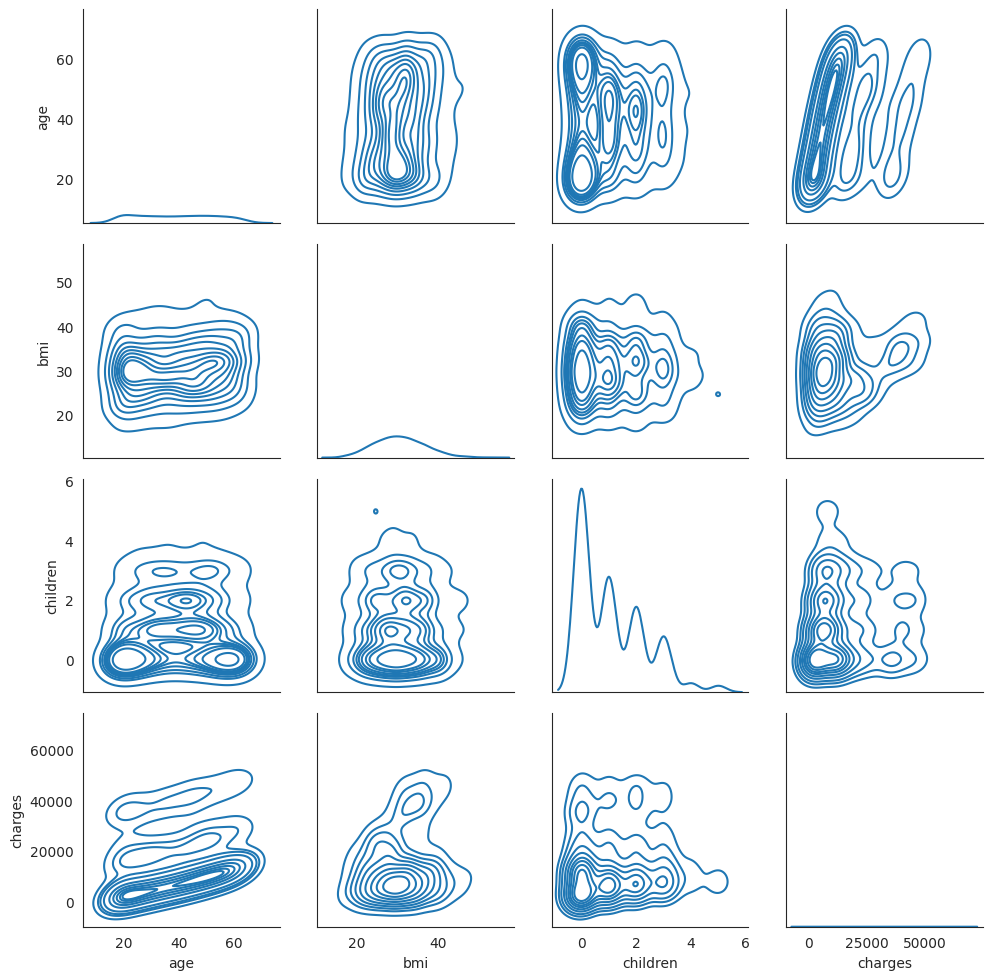

In [ ]:
#  to customize pairplot

a = sns.PairGrid(df)
a.map_diag(sns.kdeplot)
a.map_offdiag(sns.kdeplot, n_levels=10)
plt.show()

## **3D plots**

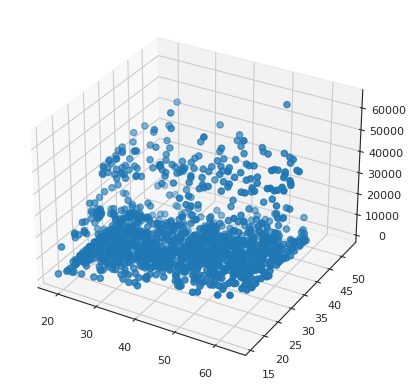

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming df is your DataFrame
font = {'size': 8}
plt.rc('font', **font)

x = df['age']
y = df['bmi']
z = df['charges']

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x, y, z)


plt.show()


### **interactive 3D, 4D and 6D plot**

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(df, x='age', y='charges', z='bmi')
fig.show()

In [ ]:
# 4d

import plotly.express as px
import pandas as pd

fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color = 'smoker')
fig.show()



In [ ]:
# 5d


import plotly.express as px
import pandas as pd

fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color = 'smoker', symbol ='sex')
fig.show()

In [ ]:
# 6d

import plotly.express as px
import pandas as pd

fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color = 'smoker', symbol ='sex', size ='children')
fig.show()

# hence sex & children has least effect
# most effect is via smoker, non smoker